In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import networkx as nx

from utils_networks import global_efficiency

In [3]:
files_path = '//domino/datasets/jaime_oliver/industry_network/scratch/'
y=2015
network_path = f'{files_path}{y}/A_country.graphml'
G = nx.readwrite.graphml.read_graphml(network_path)
global_efficiency(G)
np.mean(np.mean(nx.to_pandas_adjacency(G)))

0.007665396948000116

In [4]:
network_path = f'{files_path}{y}/migration_network.graphml'
M = nx.readwrite.graphml.read_graphml(network_path)
global_efficiency(M)
np.mean(np.mean(nx.to_pandas_adjacency(M)))

7.171761123976706e-07

In [5]:
non_zero = nx.to_pandas_adjacency(M)>0
non_zero['ARG'].sum()

0

In [6]:
def network_years_generator(network):

    files_path = '//domino/datasets/jaime_oliver/industry_network/scratch/'
    
    all_years = []
    for y in range(2005, 2016):
        network_path = f'{files_path}{y}/{network}.graphml'
        G = nx.readwrite.graphml.read_graphml(network_path)
        
        all_years.append(G)
        
    return all_years

financial_efficiency =  [global_efficiency(g) for g in network_years_generator('A_country')]
human_efficiency = [global_efficiency(g) for g in network_years_generator('migration_network')]

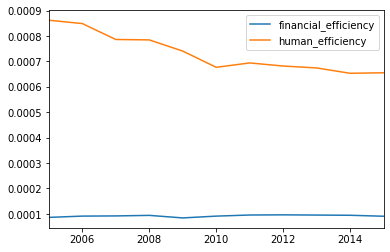

In [7]:
df = pd.DataFrame({'financial_efficiency':financial_efficiency, 
                   'human_efficiency':human_efficiency}, index=range(2005, 2016))

#df = df.apply(lambda x: x/x.min())

df.plot()
plt.show()

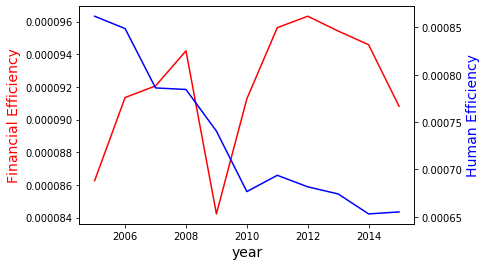

In [8]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df.index, df.financial_efficiency, color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Financial Efficiency",color="red",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df.index, df.human_efficiency ,color="blue")
ax2.set_ylabel("Human Efficiency",color="blue",fontsize=14)
plt.show()

In [9]:
df.describe()

,financial_efficiency,human_efficiency
count,11.000000,11.000000
mean,0.000092,0.000732
std,0.000004,0.000077
min,0.000084,0.000653
25%,0.000091,0.000675
50%,0.000092,0.000694
75%,0.000095,0.000785
max,0.000096,0.000862
